In [28]:
import numpy as np # for 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings # to ignore warnings
warnings.filterwarnings("ignore") # to ignore warnings
import seaborn as sns # for plotting
from matplotlib import pyplot as plt # for plotting
from sklearn.model_selection import train_test_split # for splitting data into train and test

In [29]:
df = pd.read_csv('Churn_Modelling.csv')   # read the data

In [30]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [31]:
df.shape # to check the shape of the data

(10000, 14)

In [32]:
df.info() # to check the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [33]:
df.columns # to check the columns of the data

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [34]:
df.describe() # to check the description of the data

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [35]:
df.head() # to check the first 5 rows of the data

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [36]:
df.isnull().mean()*100 # to check the percentage of missing values in each column

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [37]:
df.shape # to check the shape of the data

(10000, 14)

In [38]:
df.drop_duplicates(inplace=True) # to drop the duplicate rows

In [39]:
df.shape # to check the shape of the data

(10000, 14)

##### No duplicate columns

In [40]:
df.isnull().sum() # to check the number of missing values in each column

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
df # to check the data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [42]:
# to check the correlation between the columns

In [43]:
df.corr() # to check the correlation between the columns

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

In [44]:
df.cov() # to check the covariance between the columns

RowNumber    CustomerId   CreditScore           Age  \
RowNumber        8.334167e+06  8.725960e+05   1629.568557     23.695370   
CustomerId       8.725960e+05  5.174815e+09  36905.141215   7164.938021   
CreditScore      1.629569e+03  3.690514e+04   9341.860157     -4.019150   
Age              2.369537e+01  7.164938e+03     -4.019150    109.994084   
Tenure          -5.422722e+01 -3.096345e+03      0.235355     -0.303229   
Balance         -1.633226e+06 -5.574297e+07  37804.076998  18525.333354   
NumOfProducts    1.216772e+01  7.101372e+02      0.687999     -0.187157   
HasCrCard        7.879288e-01 -4.599040e+02     -0.240492     -0.056036   
IsActiveMember   1.737839e+01  5.986129e+01      1.239139      0.448026   
EstimatedSalary -9.942442e+05  6.317611e+07  -7694.701048  -4343.372926   
Exited          -1.926838e+01 -1.810269e+02     -1.054722      1.205250   

                      Tenure       Balance  NumOfProducts   HasCrCard  \
RowNumber         -54.227223 -1.633226e+06      12.167717    0.787929   
CustomerId      -3096.345023 -5.574297e+07     710.137218 -459.904002   
CreditScore         0.235355  3.780408e+04       0.687999   -0.240492   
Age                -0.303229  1.852533e+04      -0.187157   -0.056036   
Tenure              8.364673 -2.211395e+03       0.022616    0.029773   
Balance         -2211.394696  3.893436e+09  -11039.815064 -422.619801   
NumOfProducts       0.022616 -1.103982e+04       0.338322    0.000844   
HasCrCard           0.029773 -4.226198e+02       0.000844    0.207791   
IsActiveMember     -0.040997 -3.144831e+02       0.002794   -0.002703   
EstimatedSalary  1294.686597  4.592389e+07     475.147781 -260.410522   
Exited             -0.016309  2.978932e+03      -0.011203   -0.001310   

                 IsActiveMember  EstimatedSalary       Exited  
RowNumber             17.378388    -9.942442e+05   -19.268377  
CustomerId            59.861288     6.317611e+07  -181.026889  
CreditScore            1.239139    -7.694701e+03    -1.054722  
Age                    0.448026    -4.343373e+03     1.205250  
Tenure                -0.040997     1.294687e+03    -0.016309  
Balance             -314.483074     4.592389e+07  2978.931708  
NumOfProducts          0.002794     4.751478e+02    -0.011203  
HasCrCard             -0.002703    -2.604105e+02    -0.001310  
IsActiveMember         0.249797    -3.282927e+02    -0.031429  
EstimatedSalary     -328.292660     3.307457e+09   280.204670  
Exited                -0.031429     2.802047e+02     0.162223

In [45]:
#EDA - Exploratory Data Analysis

In [46]:
#BAR PLOT

<BarContainer object of 10000 artists>

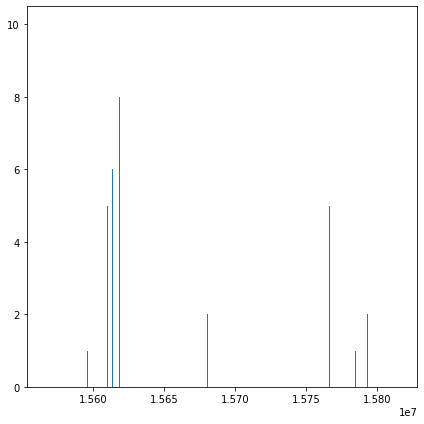

In [47]:
import matplotlib.pyplot as plt # for plotting
plt.subplots(figsize=(7,7)) # to set the size of the plot
plt.bar(df['CustomerId'],df['Tenure']) # to plot the bar plot

<AxesSubplot:xlabel='CustomerId', ylabel='CreditScore'>

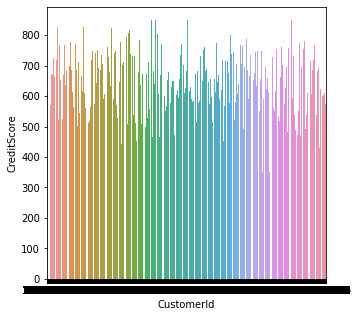

In [48]:
import seaborn as sns # for plotting
plt.subplots(figsize=(5,5)) # to set the size of the plot
sns.barplot(x='CustomerId', y='CreditScore',data=df) # to plot the bar plot

### Histogram

In [49]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

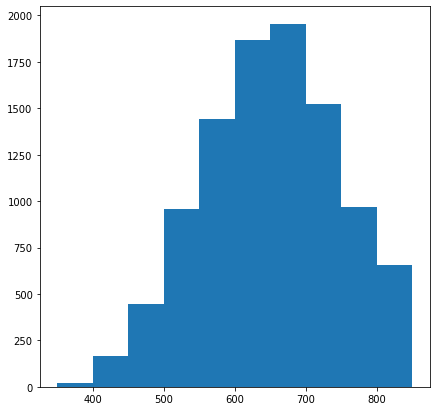

In [50]:
plt.subplots(figsize=(7,7)) # to set the size of the plot
plt.hist(df['CreditScore']) # to plot the histogram

### Scatter 

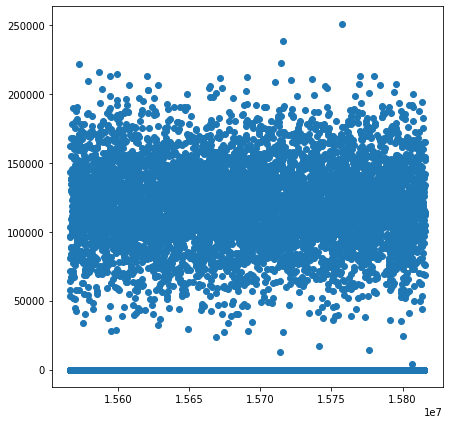

In [51]:
plt.subplots(figsize=(7,7)) # to set the size of the plot
plt.scatter(df['CustomerId'],df['Balance']) # to plot the scatter plot

### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x22113e2ca00>,
 'caps': [<matplotlib.lines.Line2D at 0x221131ab3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22113e39c40>],
 'medians': [<matplotlib.lines.Line2D at 0x221131ab970>],
 'fliers': [<matplotlib.lines.Line2D at 0x221131abc40>],
 'means': []}

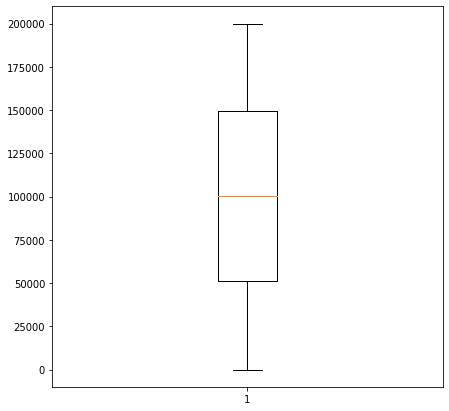

In [52]:
plt.subplots(figsize=(7,7)) # to set the size of the plot
plt.boxplot(df['EstimatedSalary']) # to plot the box plot

### Distplot

<AxesSubplot:ylabel='Density'>

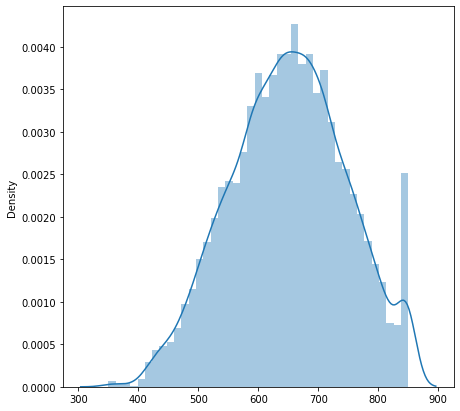

In [53]:
plt.subplots(figsize=(7,7)) # to set the size of the plot
sns.distplot(x=df['CreditScore']) # to plot the distribution plot

### violin plot

<AxesSubplot:xlabel='Tenure', ylabel='CustomerId'>

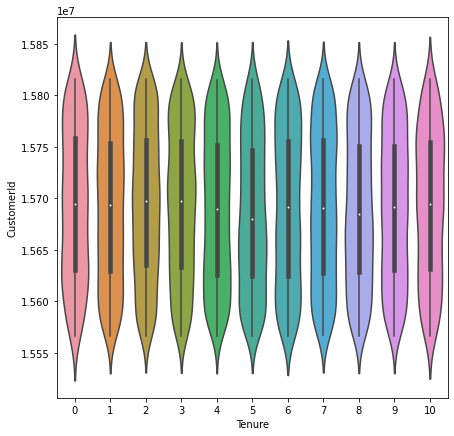

In [54]:
plt.subplots(figsize=(7,7)) # to set the size of the plot
sns.violinplot(y=df['CustomerId'],x=df['Tenure']) # to plot the violin plot

# Pair plot

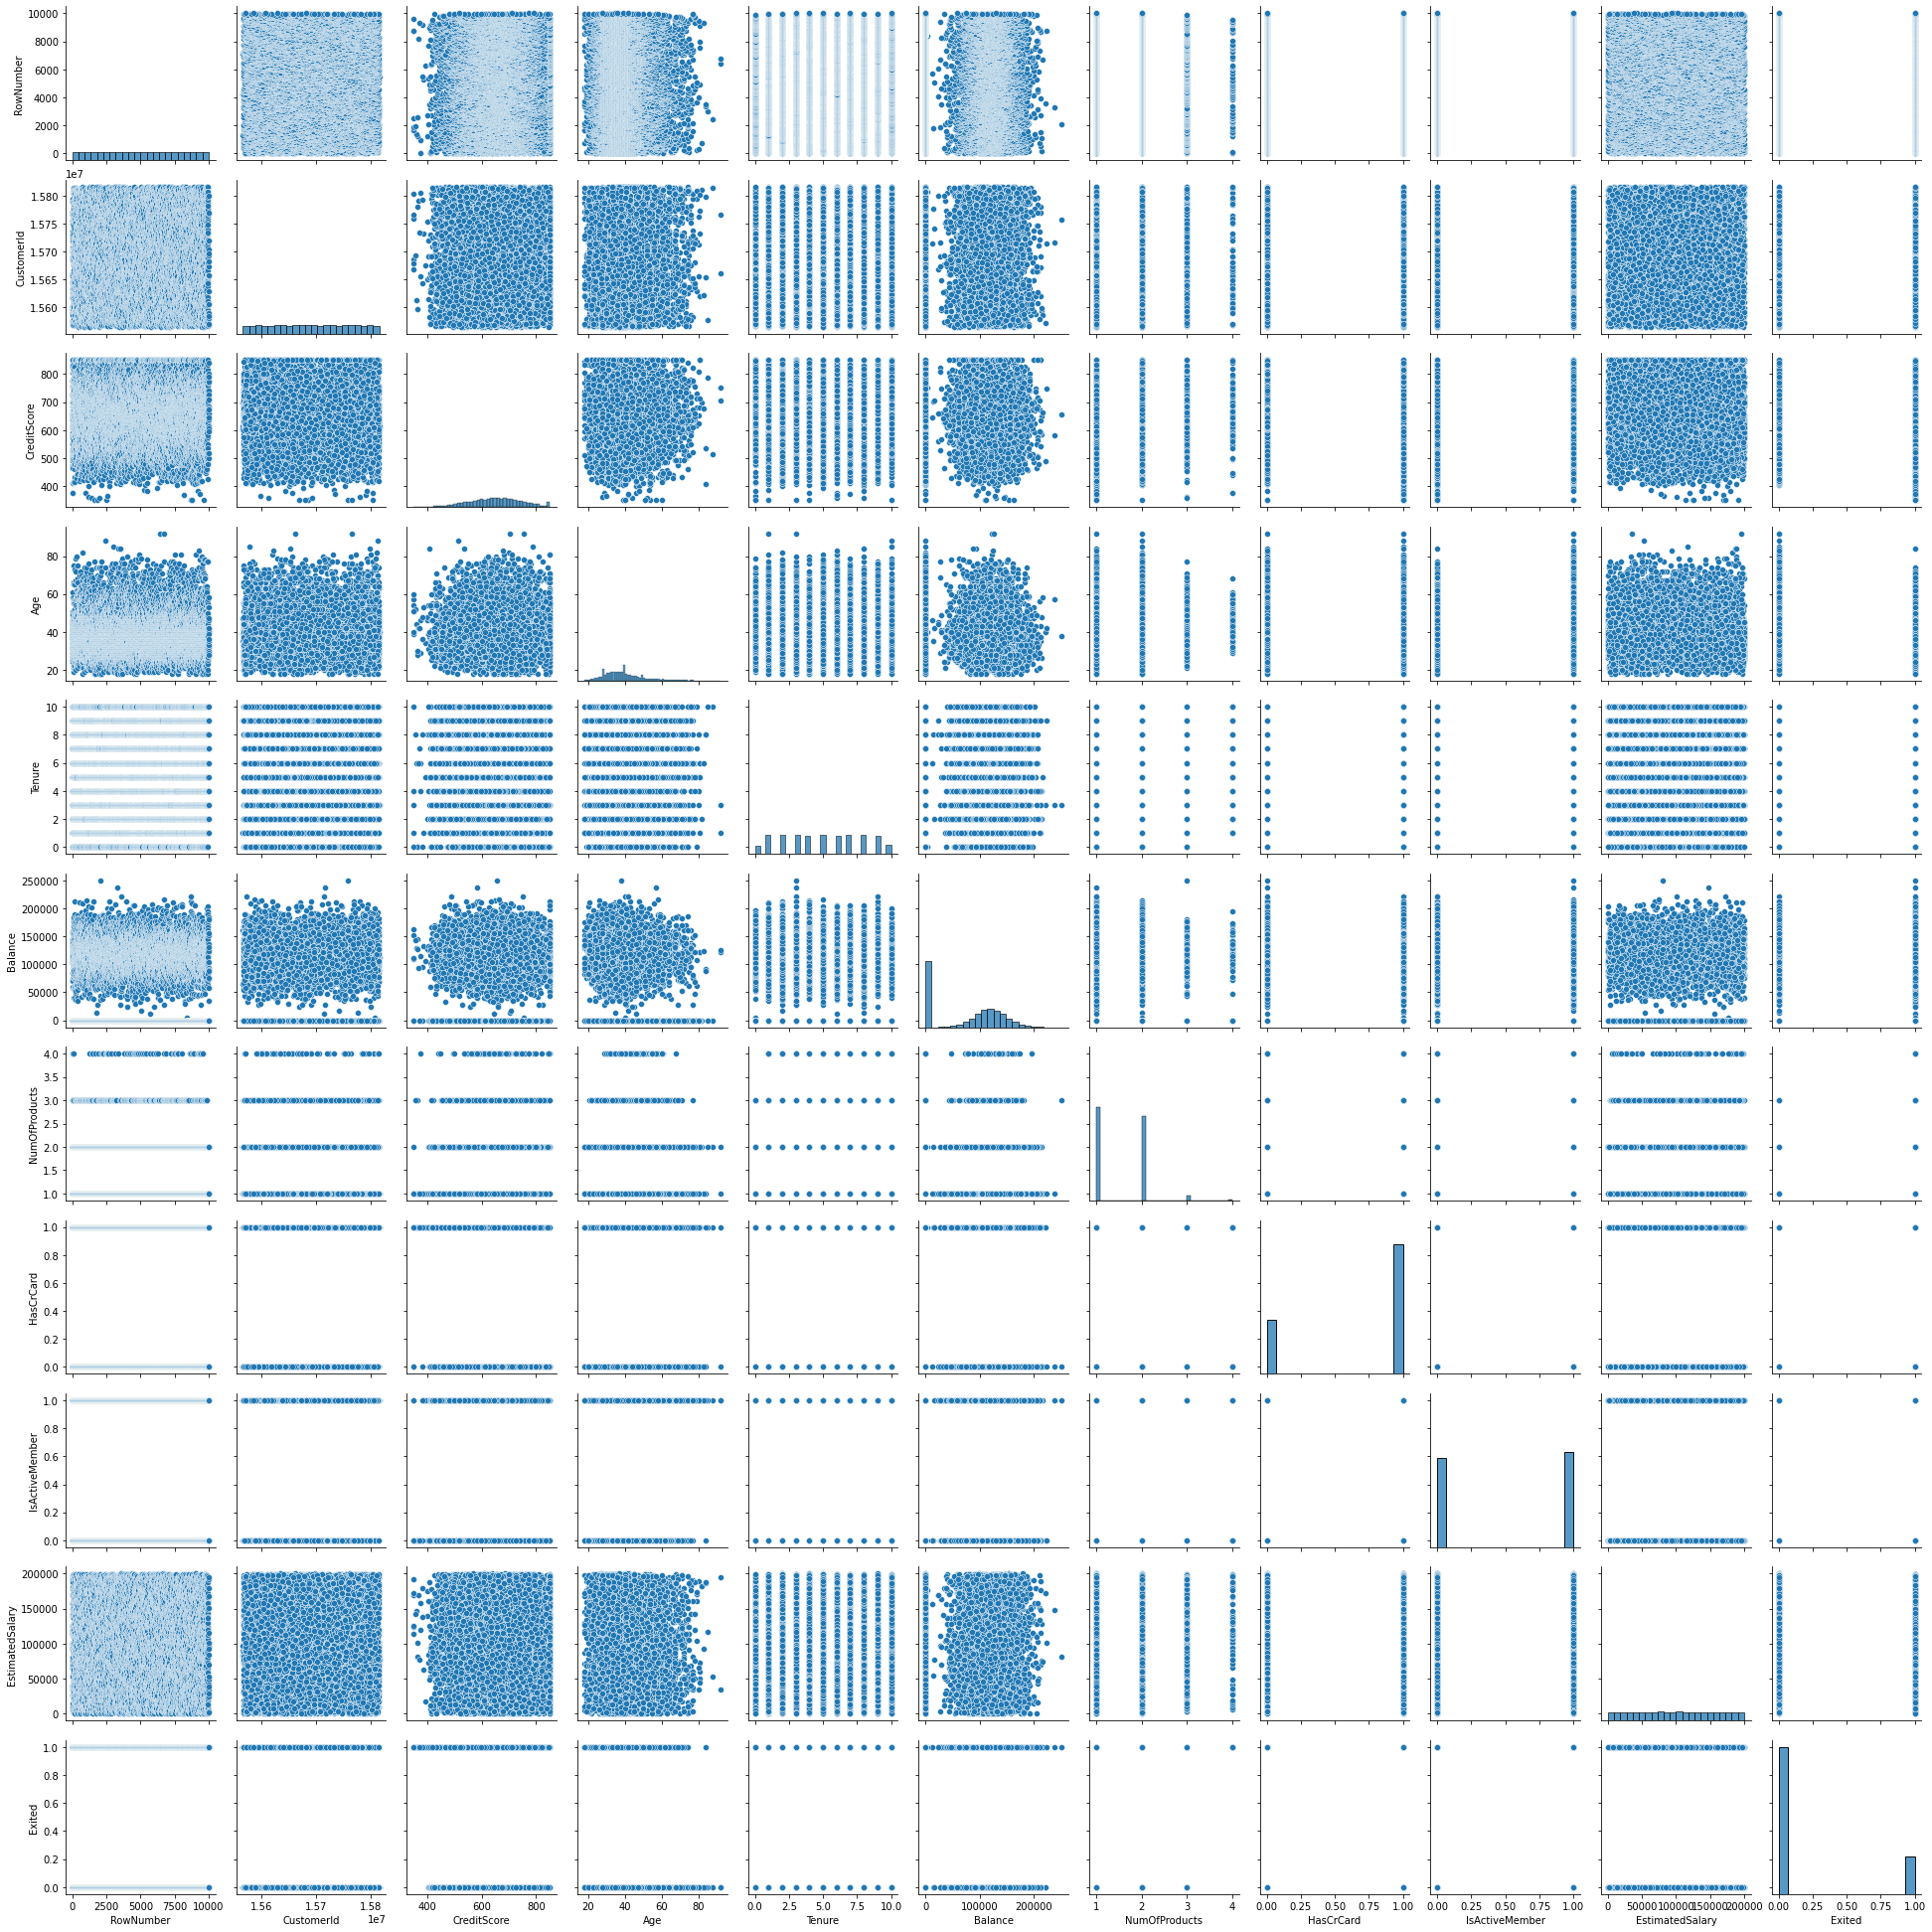

In [55]:
sns.pairplot(df) # to plot the pair plot

### Feature Engineering

<AxesSubplot:>

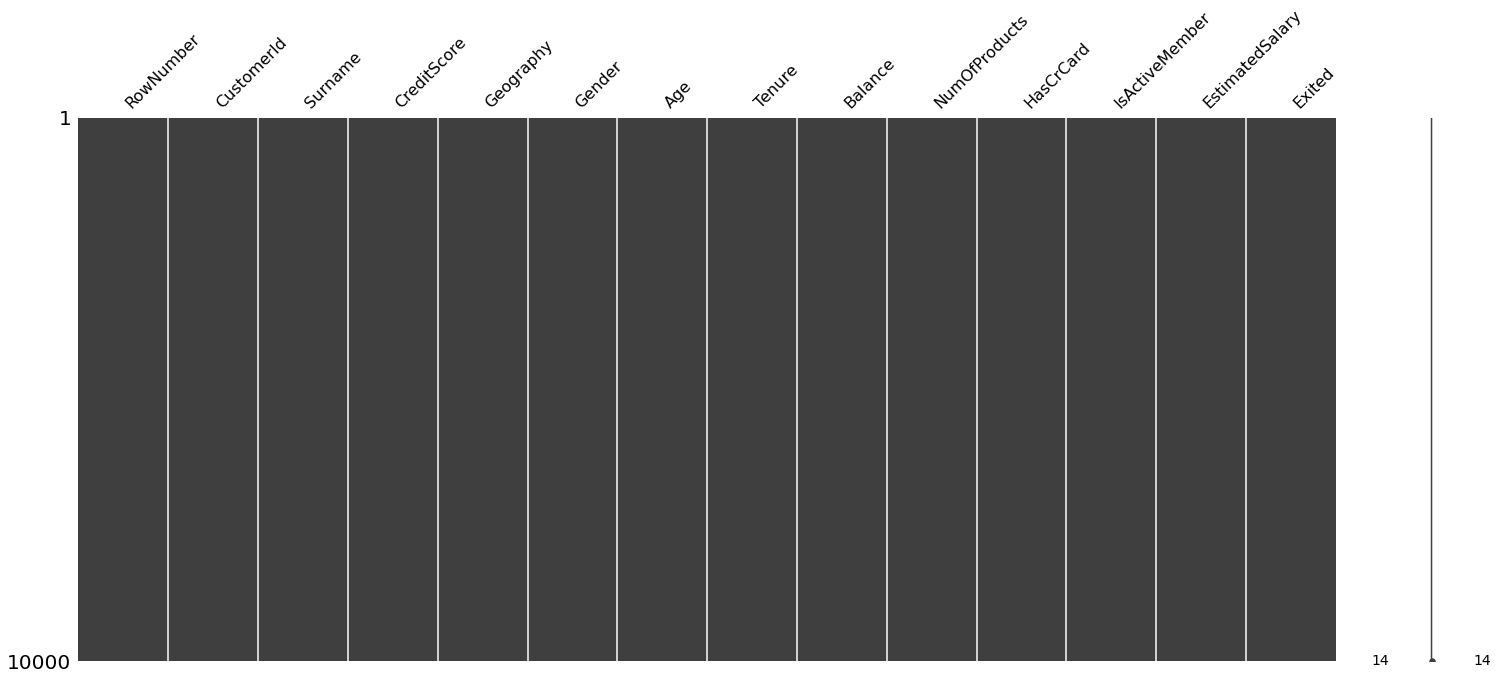

In [56]:

import missingno as m # to plot the missing values
m.matrix(df) # to plot the missing values

In [57]:
threshold = 0.2 # to set the threshold

In [58]:
data = df[df.columns[df.isnull().mean() < threshold]]
data.shape

(10000, 14)

In [59]:
data = data.loc[df.isnull().mean(axis=1) < threshold] # to drop the columns with more than 20% missing values
data.shape # to check the shape of the data

(10000, 14)

In [60]:
df # to check the data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [61]:
data=df.copy() # to copy the data

In [62]:
data.drop(['Surname','CustomerId','RowNumber'],axis=1,inplace=True) # to drop the columns

In [63]:
from sklearn.preprocessing import LabelEncoder # to encode the categorical data
le = LabelEncoder() # to create the object of LabelEncoder
data['Geography'] = le.fit_transform(data['Geography']) # to encode the categorical data
data['Gender'] = le.fit_transform(data['Gender'])  #            


In [64]:
X = data.drop(['Exited'], axis=1) #                 

In [65]:
 y = data['Exited'] #             

# SMOTE

In [66]:

from imblearn.over_sampling import SMOTE #          
sm = SMOTE() #         
X=data[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']] #        
y=data[['Exited']] #             
X_smote, y_smote = sm.fit_resample(X, y) #             

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0) # to split the data into train and test

In [68]:
print(X_train.shape) # to check the shape of the train data
print(X_test.shape) # to check the shape of the test data
print(y_train.shape) # to check the shape of the train data
print(y_test.shape) # to check the shape of the test data

(11148, 10)
(4778, 10)
(11148, 1)
(4778, 1)


In [69]:
data.dtypes # to check the data types of the data

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [70]:
from sklearn.preprocessing import StandardScaler # to scale the data
sc = StandardScaler() # to create the object of StandardScaler
X_train = sc.fit_transform(X_train) # to scale the train data
X_test = sc.transform(X_test) # to scale the test data

### Modeling 

### You need to make different blank list for different evaluation matrix

# logistic Regression

In [71]:
Algorithm=[] # to store the algorithm names
Accuracy=[] # to store the accuracy of the algorithm

In [72]:
from sklearn.linear_model import LogisticRegression # to create the object of LogisticRegression
lr= LogisticRegression(random_state = 5) # to create the object of LogisticRegression
lr.fit(X_train,y_train) # to fit the data
Algorithm.append('Logistic Regression') # to store the algorithm name

In [73]:
y_pred = lr.predict(X_test) # to predict the data
y_pred # to check the predicted data

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # to create the object of confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred) # to create the confusion matrix
print('Confusion Matrix') # to print the confusion matrix
print(cm) # to print the confusion matrix

Confusion Matrix
[[1816  568]
 [ 479 1915]]


<AxesSubplot:>

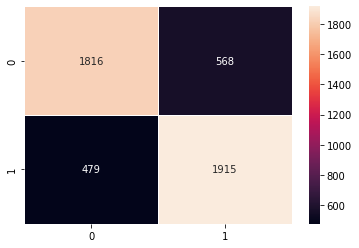

In [75]:
import seaborn as sns # to create the object of seaborn
sns.heatmap(cm,annot = True, linewidth=1,fmt="d") # to plot the heatmap

In [76]:
from sklearn.metrics import accuracy_score # to create the object of accuracy_score
acc=accuracy_score(y_test, y_pred)*100 # to calculate the accuracy
Accuracy.append(acc) # to store the accuracy
print("Accuracy Score : ",acc) #to print the accuracy score

Accuracy Score :  78.08706571787359


In [77]:
from sklearn.metrics import classification_report # to create the object of classification_report
print(classification_report(y_test,y_pred, digits=5)) # to print the classification report

              precision    recall  f1-score   support

           0    0.79129   0.76174   0.77623      2384
           1    0.77124   0.79992   0.78532      2394

    accuracy                        0.78087      4778
   macro avg    0.78126   0.78083   0.78078      4778
weighted avg    0.78124   0.78087   0.78079      4778



In [78]:
for i in Algorithm,Accuracy: # to print the algorithm name and accuracy
    print(i,end=',') # to print the algorithm name and accuracy

['Logistic Regression'],[78.08706571787359],

# Support Vector Classifier

In [79]:
from sklearn import svm # to create the object of svm
svc = svm.SVC() # to create the object of svm
svc.fit(X_train,y_train) # to fit the data
Algorithm.append('Support Vector Classifier') # to store the algorithm name

In [80]:
y_pred = svc.predict(X_test) # to predict the data
y_pred# to check the predicted data

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # to create the object of confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred) # to create the confusion matrix
print('Confusion Matrix') # to print the confusion matrix
print(cm) # to print the confusion matrix
acc=accuracy_score(y_test, y_pred) # to calculate the accuracy
Accuracy.append(acc) # to store the accuracy
print("Accuracy Score : ",acc)#to print the accuracy score
print(classification_report(y_test,y_pred, digits=5))# to print the classification report

Confusion Matrix
[[2002  382]
 [ 426 1968]]
Accuracy Score :  0.8308915864378401
              precision    recall  f1-score   support

           0    0.82455   0.83977   0.83209      2384
           1    0.83745   0.82206   0.82968      2394

    accuracy                        0.83089      4778
   macro avg    0.83100   0.83091   0.83088      4778
weighted avg    0.83101   0.83089   0.83088      4778



In [82]:
for i in Algorithm,Accuracy: # to print the algorithm name and accuracy
    print(i,end=',')# to print the algorithm name and accuracy

['Logistic Regression', 'Support Vector Classifier'],[78.08706571787359, 0.8308915864378401],

# KNN Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier # to create the object of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', p = 2) # to create the object of KNeighborsClassifier
knn.fit(X_train, y_train) # to fit the data
Algorithm.append('KNN Classifier') # to store the algorithm name

In [84]:
y_pred = knn.predict(X_test) # to predict the data
y_pred # to check the predicted data

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # to create the object of confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred) # to create the confusion matrix
print('Confusion Matrix')# to print the confusion matrix
print(cm)# to print the confusion matrix
acc=accuracy_score(y_test, y_pred)# to calculate the accuracy
Accuracy.append(acc)# to store the accuracy
print("Accuracy Score : ",acc)#to print the accuracy score
print(classification_report(y_test,y_pred, digits=5))# to print the classification report

Confusion Matrix
[[1872  512]
 [ 354 2040]]
Accuracy Score :  0.818752616157388
              precision    recall  f1-score   support

           0    0.84097   0.78523   0.81215      2384
           1    0.79937   0.85213   0.82491      2394

    accuracy                        0.81875      4778
   macro avg    0.82017   0.81868   0.81853      4778
weighted avg    0.82013   0.81875   0.81854      4778



In [86]:
for i in Algorithm,Accuracy: # to print the algorithm name and accuracy
    print(i,end=',') # to print the algorithm name and accuracy

['Logistic Regression', 'Support Vector Classifier', 'KNN Classifier'],[78.08706571787359, 0.8308915864378401, 0.818752616157388],

# Naive Bayes Classifier

In [87]:
from sklearn.naive_bayes import GaussianNB # to create the object of GaussianNB
nbc = GaussianNB() # to create the object of GaussianNB
nbc.fit(X_train, y_train) # to fit the data
Algorithm.append('Naive Bayers Classifier') # to store the algorithm name

In [88]:
y_pred = nbc.predict(X_test) # to predict the data
y_pred # to check the predicted data

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report# to create the object of confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)# to create the confusion matrix
print('Confusion Matrix')# to print the confusion matrix
print(cm)# to print the confusion matrix
acc=accuracy_score(y_test, y_pred)# to calculate the accuracy
Accuracy.append(acc)# to store the accuracy
print("Accuracy Score : ",acc)#to print the accuracy score
print(classification_report(y_test,y_pred, digits=5))# to print the classification report

Confusion Matrix
[[1913  471]
 [ 466 1928]]
Accuracy Score :  0.8038928421933863
              precision    recall  f1-score   support

           0    0.80412   0.80243   0.80328      2384
           1    0.80367   0.80535   0.80451      2394

    accuracy                        0.80389      4778
   macro avg    0.80389   0.80389   0.80389      4778
weighted avg    0.80389   0.80389   0.80389      4778



In [90]:
for i in Algorithm,Accuracy:# to print the algorithm name and accuracy
    print(i,end=',')# to print the algorithm name and accuracy

['Logistic Regression', 'Support Vector Classifier', 'KNN Classifier', 'Naive Bayers Classifier'],[78.08706571787359, 0.8308915864378401, 0.818752616157388, 0.8038928421933863],

# Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier# to create the object of DecisionTreeClassifier
dtc = DecisionTreeClassifier()# to create the object of DecisionTreeClassifier
dtc.fit(X_train, y_train)# to fit the data
Algorithm.append('Decision Tree Classifier')# to store the algorithm name

In [92]:
y_pred = dtc.predict(X_test)# to predict the data
y_pred# to check the predicted data

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report# to create the object of confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)# to create the confusion matrix
print('Confusion Matrix')# to print the confusion matrix
print(cm)# to print the confusion matrix
acc=accuracy_score(y_test, y_pred)# to calculate the accuracy
Accuracy.append(acc)# to store the accuracy
print("Accuracy Score : ",acc)#to print the accuracy score
print(classification_report(y_test,y_pred, digits=5))# to print the classification report

Confusion Matrix
[[1826  558]
 [ 440 1954]]
Accuracy Score :  0.7911259941398074
              precision    recall  f1-score   support

           0    0.80583   0.76594   0.78538      2384
           1    0.77787   0.81621   0.79658      2394

    accuracy                        0.79113      4778
   macro avg    0.79185   0.79107   0.79098      4778
weighted avg    0.79182   0.79113   0.79099      4778



In [94]:
for i in Algorithm,Accuracy:# to print the algorithm name and accuracy
    print(i,end=',')# to print the algorithm name and accuracy

['Logistic Regression', 'Support Vector Classifier', 'KNN Classifier', 'Naive Bayers Classifier', 'Decision Tree Classifier'],[78.08706571787359, 0.8308915864378401, 0.818752616157388, 0.8038928421933863, 0.7911259941398074],

# Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier# to create the object of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)# to create the object of RandomForestClassifier
rfc.fit(X_train, y_train)# to fit the data
Algorithm.append('Random Forest Classifier')# to store the algorithm name

In [96]:
y_pred = rfc.predict(X_test)# to predict the data
y_pred# to check the predicted data

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report# to create the object of confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)# to create the confusion matrix
print('Confusion Matrix')# to print the confusion matrix
print(cm)# to print the confusion matrix
acc=accuracy_score(y_test, y_pred)# to calculate the accuracy
Accuracy.append(acc)# to store the accuracy
print("Accuracy Score : ",acc)#to print the accuracy score
print(classification_report(y_test,y_pred, digits=5))# to print the classification report

Confusion Matrix
[[2030  354]
 [ 423 1971]]
Accuracy Score :  0.8373796567601507
              precision    recall  f1-score   support

           0    0.82756   0.85151   0.83936      2384
           1    0.84774   0.82331   0.83535      2394

    accuracy                        0.83738      4778
   macro avg    0.83765   0.83741   0.83735      4778
weighted avg    0.83767   0.83738   0.83735      4778



In [98]:
for i in Algorithm,Accuracy:# to print the algorithm name and accuracy
    print(i,end=',')# to print the algorithm name and accuracy

['Logistic Regression', 'Support Vector Classifier', 'KNN Classifier', 'Naive Bayers Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],[78.08706571787359, 0.8308915864378401, 0.818752616157388, 0.8038928421933863, 0.7911259941398074, 0.8373796567601507],

# XGBoost

In [99]:
import xgboost as xgb# to create the object of xgboost

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)# to create the object of xgboost
model_xgb.fit(X_train, y_train)# to fit the data
Algorithm.append('XGboost')# to store the algorithm name

In [100]:
y_pred = model_xgb.predict(X_test)# to predict the data
y_pred# to check the predicted data

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report# to create the object of confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)# to create the confusion matrix
print('Confusion Matrix')# to print the confusion matrix
print(cm)# to print the confusion matrix
acc=accuracy_score(y_test, y_pred)# to calculate the accuracy
Accuracy.append(acc)# to store the accuracy
print("Accuracy Score : ",acc)#to print the accuracy score
print(classification_report(y_test,y_pred, digits=5))# to print the classification report

Confusion Matrix
[[2015  369]
 [ 332 2062]]
Accuracy Score :  0.8532858936793638
              precision    recall  f1-score   support

           0    0.85854   0.84522   0.85183      2384
           1    0.84821   0.86132   0.85472      2394

    accuracy                        0.85329      4778
   macro avg    0.85338   0.85327   0.85327      4778
weighted avg    0.85337   0.85329   0.85327      4778



In [102]:
for i in Algorithm,Accuracy:# to print the algorithm name and accuracy
    print(i,end=',')# to print the algorithm name and accuracy

['Logistic Regression', 'Support Vector Classifier', 'KNN Classifier', 'Naive Bayers Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGboost'],[78.08706571787359, 0.8308915864378401, 0.818752616157388, 0.8038928421933863, 0.7911259941398074, 0.8373796567601507, 0.8532858936793638],

# Roc Auc - Evaluation

In [103]:
from sklearn.metrics import roc_curve,roc_auc_score# to create the object of roc_curve,roc_auc_score

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)# to create the roc curve
auc_score = roc_auc_score(y_test,y_pred)# to calculate the auc score
Algorithm.append('Roc Auc - Evaluation')# to store the algorithm name

In [104]:
auc_score# to print the auc score

0.8532690436942468

In [105]:
Accuracy.append(auc_score)# to store the auc score

In [106]:
random_probs = [0 for i in range(len(y_test))] # to create the random probability
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)# to create the random roc curve

In [107]:
import plotly.graph_objects as go # to create the plotly graph

# Add data

fig = go.Figure() # to create the figure
# Create and style traces
fig.add_trace(go.Scatter(x=fpr1, y=tpr1, name='XGB Regression', # to create the scatter plot
                         line=dict(color='firebrick', width=4))) # to create the line

fig.add_trace(go.Scatter(x=p_fpr, y=p_tpr, name='Random', # to create the scatter plot
                         line=dict(color='rebeccapurple', width=4))) # to create the line



fig.show() # to show the plot

In [108]:
dict={'Algorithm':Algorithm,'Accuracy':Accuracy} # to create the dictionary
comparison_table=pd.DataFrame(dict) # to create the dataframe
comparison_table # to print the dataframe

Algorithm   Accuracy
0        Logistic Regression  78.087066
1  Support Vector Classifier   0.830892
2             KNN Classifier   0.818753
3    Naive Bayers Classifier   0.803893
4   Decision Tree Classifier   0.791126
5   Random Forest Classifier   0.837380
6                    XGboost   0.853286
7       Roc Auc - Evaluation   0.853269